In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data=pd.read_table("fruit_data_with_colors.txt")
print(data.isna().sum())

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


In [122]:
print(data.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [123]:
x=data[['mass', 'width', 'height', 'color_score']]
y=data["fruit_label"]

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [125]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

([<matplotlib.axis.XTick at 0x7f451d0dbc10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

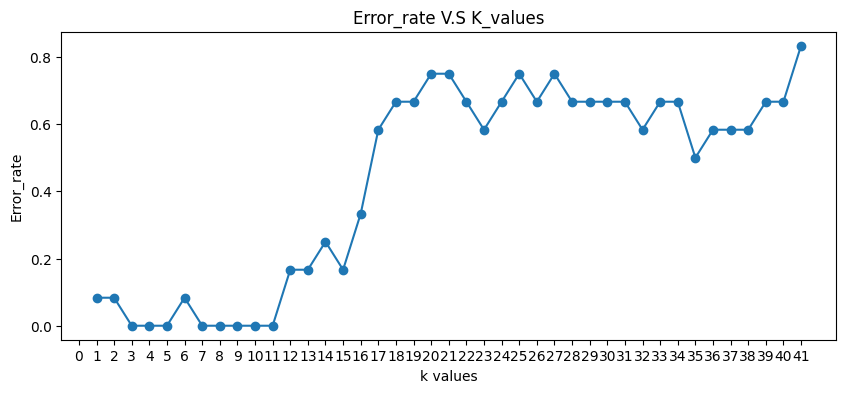

In [126]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,42):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(10,4))
plt.plot(range(1,42),error_rate,marker='o')
plt.xlabel("k values")
plt.ylabel("Error_rate")
plt.title("Error_rate V.S K_values")
plt.xticks(np.arange(0,42,1))

In [127]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[3 3 4 3 1 1 3 4 3 1 2 1]


In [128]:
mdl_data=pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
mdl_data.rename(columns={0:"Predicted_data"},inplace=True)
print(mdl_data.head())

   fruit_label  Predicted_data
0            3               3
1            3               3
2            4               4
3            3               3
4            1               1


In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Confussion matrix : \n",confusion_matrix(mdl_data["fruit_label"],mdl_data["Predicted_data"]))
print("Accuracy score : {:.2f}".format(accuracy_score(mdl_data["fruit_label"],mdl_data["Predicted_data"])))

Confussion matrix : 
 [[4 0 0 0]
 [0 1 0 0]
 [0 0 5 0]
 [0 0 0 2]]
Accuracy score : 1.00


In [130]:
print("Classification report : ")
print(classification_report(mdl_data["fruit_label"],mdl_data["Predicted_data"]))

Classification report : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

